Berner Fachhochschule BFH - MAS Data Science - Graph Machine Learning - Master Thesis FS/2022 Thomas Iten

# 17. Experiment - Similarity based Graph Link Prediction

**Referenzen**<br />
[1] https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html<br />
[2] Stamile, Marzullo, Deusebio. Graph Machine Learning. Packt Publishing 2021. ISBN 978-1-80020-449-2



In [49]:
from gml.graph.graph_link import GraphLink, Algorithm
from gml.graph.graph_viz import GraphViz
from gml.graph.data_factory import DataFactory, EdgeLabelFactory

## Scenario A -  Matching Cluster - Mitarbeiter

<img src="img/test-scenario1.png" alt="Test Scenario 1" width="800"/>

### Scenario A - Exploration

#### Create graph and link predictions for all missing edges

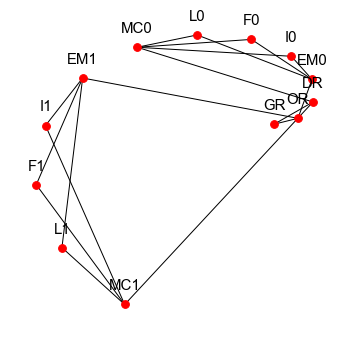

Link Predictions:
          Edge        CN  PA        JC        AA
0    (GR, EM0)  2.100000   8  0.200000  0.910239
1     (GR, I0)  0.866667   4  0.000000  0.000000
2     (GR, F0)  0.866667   4  0.000000  0.000000
3     (GR, L0)  0.866667   4  0.000000  0.000000
4    (GR, MC0)  2.100000   8  0.200000  0.910239
5    (GR, EM1)  2.100000   8  0.200000  0.910239
6     (GR, I1)  0.866667   4  0.000000  0.000000
7     (GR, F1)  0.866667   4  0.000000  0.000000
8     (GR, L1)  0.866667   4  0.000000  0.000000
9    (GR, MC1)  2.100000   8  0.200000  0.910239
10    (OR, DR)  2.100000   9  0.200000  1.442695
11    (OR, I0)  2.100000   6  0.250000  0.721348
12    (OR, F0)  2.100000   6  0.250000  0.721348
13    (OR, L0)  2.100000   6  0.250000  0.721348
14   (OR, MC0)  0.866667  12  0.000000  0.000000
15    (OR, I1)  2.100000   6  0.250000  0.721348
16    (OR, F1)  2.100000   6  0.250000  0.721348
17    (OR, L1)  2.100000   6  0.250000  0.721348
18   (OR, MC1)  0.866667  12  0.000000  0.000000
19

In [50]:
graph = DataFactory().create_graph(n=2, connected=True)
graph.draw(layout=GraphViz.SPIRAL_LAYOUT)

possible_edges = graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.print_results(title="Link Predictions:")

#### Normalize results, filter edges of interest, label results and show metrics

In [51]:
# First normalize, then filter edges of interest
gl.normalize()
gl.filter([("EM0","MC0"),("EM0", "MC1"),("EM1","MC0"),("EM1", "MC1")])

gl.print_results(title="Predictions normalized:", incl_legend=False)
print()

gl.label(threshold=0.8)
gl.print_results(title="Prediction labels with threshold 0.8:", incl_legend=False)
print()

y_true = [1,0,0,1]
gl.print_metrics(y_true, title="Metrics:")

Predictions normalized:
         Edge        CN   PA   JC   AA
0  (EM0, MC0)  1.000000  1.0  0.6  1.0
1  (EM0, MC1)  0.175676  1.0  0.0  0.0
2  (EM1, MC0)  0.175676  1.0  0.0  0.0
3  (EM1, MC1)  1.000000  1.0  0.6  1.0

Prediction labels with threshold 0.8:
         Edge  CN  PA  JC  AA
0  (EM0, MC0)   1   1   0   1
1  (EM0, MC1)   0   1   0   0
2  (EM1, MC0)   0   1   0   0
3  (EM1, MC1)   1   1   0   1

Metrics:
      Metric   CN        PA   JC   AA
0  Precision  1.0  0.500000  0.0  1.0
1     Recall  1.0  1.000000  0.0  1.0
2   F1-Score  1.0  0.666667  0.0  1.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


### Scenario A - Test

#### Create link predictions for an edge sample of interest

In [52]:
n = 100
graph = DataFactory().create_graph(n=n, connected=True)

edges, labels = EdgeLabelFactory().sample("MC", "EM", n, p=0.1, shuffle=True)

gl = GraphLink(graph, edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.normalize()
gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric   CN        PA   JC   AA
0  Precision  1.0  0.500000  1.0  1.0
1     Recall  1.0  1.000000  1.0  1.0
2   F1-Score  1.0  0.666667  1.0  1.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


####  Create link predcitions for all possible edges, normalize and then filter results

In [53]:
n = 100
graph = DataFactory().create_graph(n=n, connected=True)

possible_edges =  graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.normalize()

edges, labels = EdgeLabelFactory().sample("MC", "EM", n, p=0.1, shuffle=True)
gl.filter(edges)

gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric   CN   PA   JC   AA
0  Precision  1.0  0.0  0.0  1.0
1     Recall  1.0  0.0  0.0  1.0
2   F1-Score  1.0  0.0  0.0  1.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


## Scenario B - Data Collection - Mitarbeiter

<img src="img/test-scenario2.png" alt="Test Scenario 2" width="800"/>

### Scenario B - Exploration

#### Create graph and link predictions for all missing edges

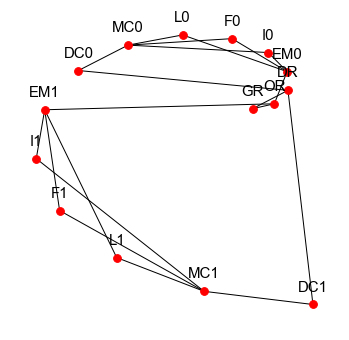

Link Predictions:
          Edge    CN  PA        JC        AA
0    (GR, EM0)  2.30   8  0.200000  0.910239
1     (GR, I0)  1.00   4  0.000000  0.000000
2     (GR, F0)  1.00   4  0.000000  0.000000
3     (GR, L0)  1.00   4  0.000000  0.000000
4    (GR, MC0)  1.00   8  0.000000  0.000000
5    (GR, DC0)  2.30   4  0.333333  0.910239
6    (GR, EM1)  2.30   8  0.200000  0.910239
7     (GR, I1)  1.00   4  0.000000  0.000000
8     (GR, F1)  1.00   4  0.000000  0.000000
9     (GR, L1)  1.00   4  0.000000  0.000000
10   (GR, MC1)  1.00   8  0.000000  0.000000
11   (GR, DC1)  2.30   4  0.333333  0.910239
12    (OR, DR)  2.30   9  0.200000  1.442695
13    (OR, I0)  2.30   6  0.250000  0.721348
14    (OR, F0)  2.30   6  0.250000  0.721348
15    (OR, L0)  2.30   6  0.250000  0.721348
16   (OR, MC0)  1.00  12  0.000000  0.000000
17   (OR, DC0)  1.00   6  0.000000  0.000000
18    (OR, I1)  2.30   6  0.250000  0.721348
19    (OR, F1)  2.30   6  0.250000  0.721348
20    (OR, L1)  2.30   6  0.250000  0

In [64]:
graph = DataFactory().create_graph(n=2, connected=True, add_dc=True)
graph.draw(layout=GraphViz.SPIRAL_LAYOUT)

possible_edges = graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.print_results(title="Link Predictions:")

#### Normalize results, filter edges of interest, label results and show metrics

In [65]:
gl.normalize()
gl.filter([("EM0","DC0"),("EM0", "DC1"),("EM1","DC0"),("EM1", "DC1")])

gl.print_results(title="Predictions normalized:", incl_legend=False)
print()

gl.label(threshold=0.8)
gl.print_results(title="Prediction labels with threshold 0.8:", incl_legend=False)
print()

y_true = [1,0,0,1]
gl.print_metrics(y_true, title="Metrics:")

Predictions normalized:
         Edge        CN   PA   JC   AA
0  (EM0, DC0)  0.256410  0.5  0.0  0.0
1  (EM0, DC1)  0.192308  0.5  0.0  0.0
2  (EM1, DC0)  0.192308  0.5  0.0  0.0
3  (EM1, DC1)  0.256410  0.5  0.0  0.0

Prediction labels with threshold 0.8:
         Edge  CN  PA  JC  AA
0  (EM0, DC0)   0   0   0   0
1  (EM0, DC1)   0   0   0   0
2  (EM1, DC0)   0   0   0   0
3  (EM1, DC1)   0   0   0   0

Metrics:
      Metric   CN   PA   JC   AA
0  Precision  0.0  0.0  0.0  0.0
1     Recall  0.0  0.0  0.0  0.0
2   F1-Score  0.0  0.0  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


## Scenario C: Data Collection - Mitarbeiter typisiert

<img src="img/test-scenario3.png" alt="Test Scenario 3" width="800"/>

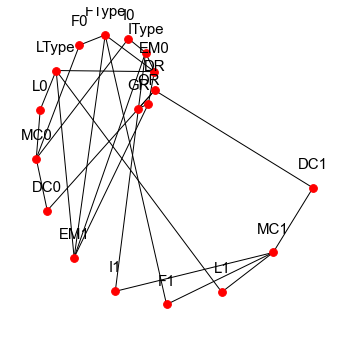

Normalized results:
               Edge    CN      PA        JC        AA
0         (GR, EM0)  0.52  0.5000  0.200000  0.296082
1       (GR, IType)  0.24  0.5000  0.000000  0.000000
2          (GR, I0)  0.18  0.2500  0.000000  0.000000
3       (GR, FType)  0.24  0.5000  0.000000  0.000000
4          (GR, F0)  0.18  0.2500  0.000000  0.000000
5       (GR, LType)  0.24  0.5000  0.000000  0.000000
6          (GR, L0)  0.18  0.2500  0.000000  0.000000
7         (GR, MC0)  0.24  0.5000  0.000000  0.000000
8         (GR, DC0)  0.52  0.2500  0.333333  0.296082
9         (GR, EM1)  0.52  0.5000  0.200000  0.296082
10         (GR, I1)  0.18  0.2500  0.000000  0.000000
11         (GR, F1)  0.18  0.2500  0.000000  0.000000
12         (GR, L1)  0.18  0.2500  0.000000  0.000000
13        (GR, MC1)  0.24  0.5000  0.000000  0.000000
14        (GR, DC1)  0.52  0.2500  0.333333  0.296082
15         (OR, DR)  0.52  0.5625  0.200000  0.469279
16      (OR, IType)  0.68  0.7500  0.400000  0.469279
17      

In [7]:
graph = DataFactory().create_graph(n=2, connected=True, add_dc=True, typed=True)
graph.draw(layout=GraphViz.SPIRAL_LAYOUT)

possible_edges = graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.print_results(title="Normalized results:", normalize=True, incl_legend=False)

In [8]:
gl.filter([("EM0","MC0"),("EM0", "MC1"),("EM1","MC0"),("EM1", "MC1"),
           ("EM0","DC0"),("EM0", "DC1"),("EM1","DC0"),("EM1", "DC1")])
gl.print_results(title="Filtered results:")


Filtered results:
         Edge    CN   PA   JC   AA
0  (EM0, MC0)  0.24  1.0  0.0  0.0
1  (EM0, DC0)  0.18  0.5  0.0  0.0
2  (EM0, MC1)  0.24  1.0  0.0  0.0
3  (EM0, DC1)  0.18  0.5  0.0  0.0
4  (EM1, MC0)  0.24  1.0  0.0  0.0
5  (EM1, DC0)  0.18  0.5  0.0  0.0
6  (EM1, MC1)  0.24  1.0  0.0  0.0
7  (EM1, DC1)  0.18  0.5  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


## Scenario D:

TODO: Variationen:
a) untyped
b) untyped ohne id
c) typed
d) typed ohne id


<img src="img/test-scenario4b.png" alt="Test Scenario 4" width="800"/>

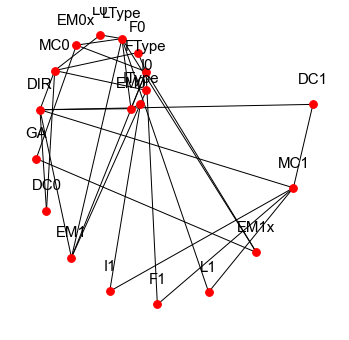

Normalized results:
               Edge        CN        PA        JC        AA
0         (EM0, I0)  0.529412  0.222222  0.200000  0.221057
1         (EM0, F0)  0.529412  0.222222  0.200000  0.171033
2         (EM0, L0)  0.529412  0.222222  0.200000  0.171033
3       (EM0, EM0x)  0.686275  0.333333  0.400000  0.342066
4        (EM0, MC0)  0.529412  0.555556  0.125000  0.171033
5         (EM0, GA)  0.248366  0.222222  0.000000  0.000000
6        (EM0, DC0)  0.529412  0.222222  0.200000  0.171033
7        (EM0, EM1)  1.000000  0.444444  1.000000  0.734156
8         (EM0, I1)  0.529412  0.222222  0.200000  0.221057
9         (EM0, F1)  0.529412  0.222222  0.200000  0.171033
10        (EM0, L1)  0.529412  0.222222  0.200000  0.171033
11      (EM0, EM1x)  0.686275  0.333333  0.400000  0.342066
12       (EM0, MC1)  0.529412  0.555556  0.125000  0.171033
13       (EM0, DC1)  0.529412  0.222222  0.200000  0.171033
14   (IType, FType)  0.686275  0.666667  0.250000  0.442114
15      (IType, F0) 

In [9]:
graph = DataFactory().create_graph_with_doubles(n=2, add_dc=True, add_type_nodes=True)
graph.draw(layout=GraphViz.SPIRAL_LAYOUT)

possible_edges = graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.print_results(title="Normalized results:", normalize=True, incl_legend=False)

In [10]:
gl.filter([("EM0","MC0"),("EM0", "MC1"),("EM1","MC0"),("EM1", "MC1"),
           ("EM0x","MC0"),("EM0x", "MC1"),("EM1x","MC0"),("EM1x", "MC1")])
gl.print_results(title="Filtered results:")


Filtered results:
          Edge        CN        PA     JC        AA
0   (EM0, MC0)  0.529412  0.555556  0.125  0.171033
1   (EM0, MC1)  0.529412  0.555556  0.125  0.171033
2  (EM0x, MC0)  0.248366  0.416667  0.000  0.000000
3  (EM0x, MC1)  0.248366  0.416667  0.000  0.000000
4   (EM1, MC0)  0.529412  0.555556  0.125  0.171033
5  (EM1x, MC0)  0.248366  0.416667  0.000  0.000000
6   (EM1, MC1)  0.529412  0.555556  0.125  0.171033
7  (EM1x, MC1)  0.248366  0.416667  0.000  0.000000

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


---
_The end._